In [3]:
%pylab inline
import pandas as pd
import os

# data visualization
import matplotlib.pyplot as plt

# NLP
import nltk

# Seaborn
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
import re, string 
import pandas as pd 
from time import time  
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec
%matplotlib inline

In [5]:
# Read file into pandas
# 3 files are yelp_labelled.txt, amazon_cells_labelled.txt, imdb_labelled.txt
df = pd.read_csv('data_2021_spring/train.csv')
df2 = pd.read_csv('data_2021_spring/valid.csv')
# Keeping only the neccessary columns
df = df[['text','stars']]
df2 = df2[['text', 'stars']]
df['len'] = [len(x) for x in df['text']]

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 764.3764798737175
std = 723.2798036472004


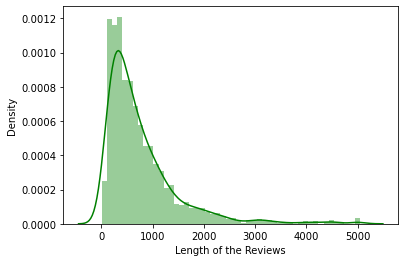

In [6]:
pos = df[(df['stars'] == 1)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print('mean =',mean(pos['len']))
print('std =', std(pos['len']))

mean = 783.6115214180206
std = 663.1157976167817


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


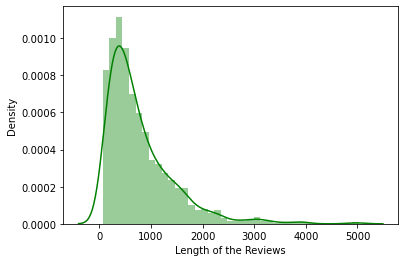

In [7]:
pos = df[(df['stars'] == 2)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print('mean =',mean(pos['len']))
print('std =', std(pos['len']))

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 711.8834745762712
std = 611.028609851797


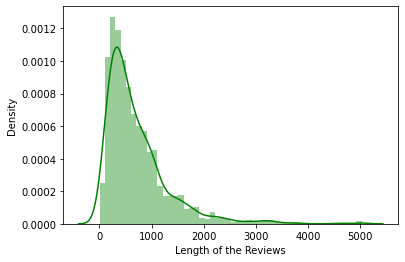

In [8]:
pos = df[(df['stars'] == 3)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print('mean =',mean(pos['len']))
print('std =', std(pos['len']))

mean = 622.2687203791469
std = 553.4531891033731


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


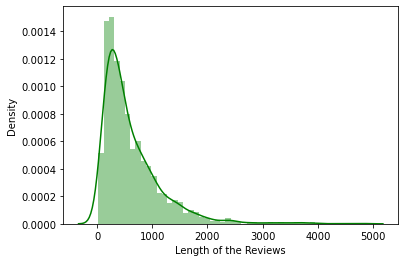

In [9]:
pos = df[(df['stars'] == 4)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print('mean =',mean(pos['len']))
print('std =', std(pos['len']))

mean = 488.9995269631031
std = 465.6404491761355


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


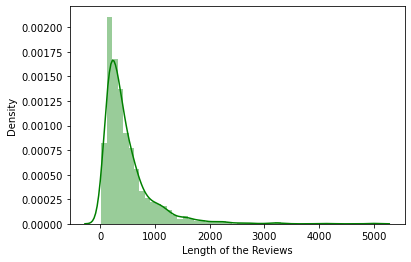

In [10]:
pos = df[(df['stars'] == 5)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print('mean =',mean(pos['len']))
print('std =', std(pos['len']))

In [11]:
df.describe(include="all")

,text,stars,len
count,10000,10000.000000,10000.000000
unique,10000,NaN,NaN
top,Annalysa was very nice and helpful for us! Mad...,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2.991600,668.870800
std,NaN,1.485177,620.352411
min,NaN,1.000000,8.000000
25%,NaN,1.000000,265.000000
50%,NaN,3.000000,478.000000
75%,NaN,4.000000,862.000000


In [12]:
# Mapping length of sentences
def len_vis(data_col):
    t_col = data_col.apply(lambda x: len(x))
    fig=plt.figure() #Plots in matplotlib reside within a figure object, use plt.figure to create new figure
    #Create one or more subplots using add_subplot, because you can't create blank figure
    ax = fig.add_subplot(1,1,1)
    #Variable
    ax.hist(t_col,bins = 50) # Here you can play with number of bins

    plt.title('Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()

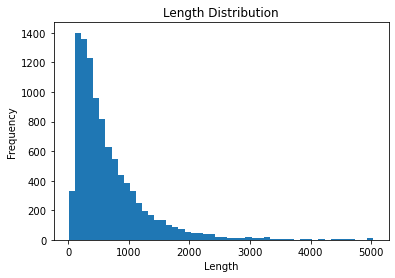

In [13]:
len_vis(df['text'])

In [14]:
def count_unique(words):
    uniq = set()
    for sentence in words:
        for word in sentence:
            uniq.add(word)
    return len(uniq)

In [15]:

#tokenize without the punctuation
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
# make reviews lowercase
df['text'] = df['text'].apply(lambda x: x.lower())
# tokenize
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x))
# make reviews lowercase
df2['text'] = df2['text'].apply(lambda x: x.lower())
# tokenize
df2['text'] = df2['text'].apply(lambda x: tokenizer.tokenize(x))
# visual check
df.head()
df2.head()

,text,stars
0,"[small, coffee, shop, on, the, corner, good, c...",5
1,"[food, was, okay, eating, off, styrofoam, with...",3
2,"[not, at, all, impressed, with, jet, maybe, it...",2
3,"[we, got, a, 14, pepperoni, pizza, i, d, say, ...",4
4,"[unfortunately, this, location, has, terrible,...",1


In [16]:
# Check feature count
count_unique(df['text'])

28074

In [17]:
# POS tag
df['posr']= df['text'].apply(lambda x: nltk.pos_tag(x))
# Leave the non POS removal ones alone
df['nposr'] = df['text']
# POS tag
df2['posr']= df2['text'].apply(lambda x: nltk.pos_tag(x))
# Leave the non POS removal ones alone
df2['nposr'] = df2['text']

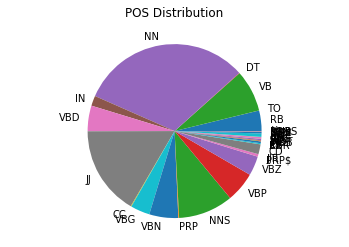

In [18]:
# Visualize Parts of Speech
pos_dict = {}
for sent in df['posr']:
    for pair in sent:
        if pair[1] in pos_dict:
            pos_dict[pair[1]].add(pair[0])
        else:
            pos_dict.update({pair[1]: set(pair[0])})

# Pie chart of POS distribution
temp = pos_dict.values()
x_list = []
for x in temp: 
    x_list.append(len(x))
label_list = pos_dict.keys()
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list) 
plt.title("POS Distribution")
plt.show()

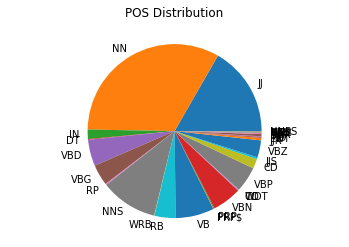

In [19]:
# Visualize Parts of Speech
pos_dict = {}
for sent in df2['posr']:
    for pair in sent:
        if pair[1] in pos_dict:
            pos_dict[pair[1]].add(pair[0])
        else:
            pos_dict.update({pair[1]: set(pair[0])})

# Pie chart of POS distribution
temp = pos_dict.values()
x_list = []
for x in temp: 
    x_list.append(len(x))
label_list = pos_dict.keys()
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list) 
plt.title("POS Distribution")
plt.show()

In [20]:
df.head()

,text,stars,len,posr,nposr
0,"[nice, to, have, a, diner, still, around, food...",4,102,"[(nice, RB), (to, TO), (have, VB), (a, DT), (d...","[nice, to, have, a, diner, still, around, food..."
1,"[tried, this, a, while, back, got, the, fried,...",2,494,"[(tried, VBN), (this, DT), (a, DT), (while, NN...","[tried, this, a, while, back, got, the, fried,..."
2,"[i, expected, more, pork, selections, on, menu...",4,193,"[(i, NN), (expected, VBD), (more, RBR), (pork,...","[i, expected, more, pork, selections, on, menu..."
3,"[yummy, this, place, is, phenomenal, it, is, p...",4,207,"[(yummy, NN), (this, DT), (place, NN), (is, VB...","[yummy, this, place, is, phenomenal, it, is, p..."
4,"[the, truffle, macaroni, cheese, and, potatoes...",5,159,"[(the, DT), (truffle, NN), (macaroni, NN), (ch...","[the, truffle, macaroni, cheese, and, potatoes..."


In [21]:
# Collection of adjectives, nouns, adverbs and verbs to keep
pos_keep = ["JJ","JJR","JJS","NN","NNP","NNS","RB","RBR","VB","VBD","VBG","VBN","VBZ"]


def remove_pos(full):
    redc =[]
    for pair in full:
        if pair[1] in pos_keep:
            redc.append(pair[0])
    return redc
# Remove the words that are not in pos_keep
df['posr']= df['posr'].apply(lambda x: remove_pos(x))
df2['posr']= df2['posr'].apply(lambda x: remove_pos(x))
df.head()

,text,stars,len,posr,nposr
0,"[nice, to, have, a, diner, still, around, food...",4,102,"[nice, have, diner, still, food, was, good, co...","[nice, to, have, a, diner, still, around, food..."
1,"[tried, this, a, while, back, got, the, fried,...",2,494,"[tried, while, back, got, fried, chicken, sand...","[tried, this, a, while, back, got, the, fried,..."
2,"[i, expected, more, pork, selections, on, menu...",4,193,"[i, expected, more, pork, selections, menu, fo...","[i, expected, more, pork, selections, on, menu..."
3,"[yummy, this, place, is, phenomenal, it, is, p...",4,207,"[yummy, place, is, phenomenal, is, pricey, urg...","[yummy, this, place, is, phenomenal, it, is, p..."
4,"[the, truffle, macaroni, cheese, and, potatoes...",5,159,"[truffle, macaroni, cheese, potatoes, gratin, ...","[the, truffle, macaroni, cheese, and, potatoes..."


In [22]:
print(count_unique(df['posr']))

26660


In [23]:

# Import the list of stopwords from NLTK
from nltk.corpus import stopwords

# Remove the stopwords and store in "No Stops" column
stop = set(stopwords.words('english'))
# Ensure "not" is kept
stop.remove("not")
df['posr_stpd'] = df['posr'].apply(lambda x: [item for item in x if item not in stop])
df['nposr_stpd'] = df['nposr'].apply(lambda x: [item for item in x if item not in stop])
df['posr_nstpd'] = df['posr']
df['nposr_nstpd'] = df['nposr']
df2['posr_stpd'] = df2['posr'].apply(lambda x: [item for item in x if item not in stop])
df2['nposr_stpd'] = df2['nposr'].apply(lambda x: [item for item in x if item not in stop])
df2['posr_nstpd'] = df2['posr']
df2['nposr_nstpd'] = df2['nposr']
# visual check
df.head()

,text,stars,len,posr,nposr,posr_stpd,nposr_stpd,posr_nstpd,nposr_nstpd
0,"[nice, to, have, a, diner, still, around, food...",4,102,"[nice, have, diner, still, food, was, good, co...","[nice, to, have, a, diner, still, around, food...","[nice, diner, still, food, good, comforting, d...","[nice, diner, still, around, food, good, comfo...","[nice, have, diner, still, food, was, good, co...","[nice, to, have, a, diner, still, around, food..."
1,"[tried, this, a, while, back, got, the, fried,...",2,494,"[tried, while, back, got, fried, chicken, sand...","[tried, this, a, while, back, got, the, fried,...","[tried, back, got, fried, chicken, sandwich, m...","[tried, back, got, fried, chicken, sandwich, m...","[tried, while, back, got, fried, chicken, sand...","[tried, this, a, while, back, got, the, fried,..."
2,"[i, expected, more, pork, selections, on, menu...",4,193,"[i, expected, more, pork, selections, menu, fo...","[i, expected, more, pork, selections, on, menu...","[expected, pork, selections, menu, food, good,...","[expected, pork, selections, menu, food, good,...","[i, expected, more, pork, selections, menu, fo...","[i, expected, more, pork, selections, on, menu..."
3,"[yummy, this, place, is, phenomenal, it, is, p...",4,207,"[yummy, place, is, phenomenal, is, pricey, urg...","[yummy, this, place, is, phenomenal, it, is, p...","[yummy, place, phenomenal, pricey, urge, splur...","[yummy, place, phenomenal, pricey, feel, urge,...","[yummy, place, is, phenomenal, is, pricey, urg...","[yummy, this, place, is, phenomenal, it, is, p..."
4,"[the, truffle, macaroni, cheese, and, potatoes...",5,159,"[truffle, macaroni, cheese, potatoes, gratin, ...","[the, truffle, macaroni, cheese, and, potatoes...","[truffle, macaroni, cheese, potatoes, gratin, ...","[truffle, macaroni, cheese, potatoes, au, grat...","[truffle, macaroni, cheese, potatoes, gratin, ...","[the, truffle, macaroni, cheese, and, potatoes..."


In [24]:
# check feature count
count_unique(df['posr_stpd'])

26573

In [25]:

ps = nltk.PorterStemmer()
ss = nltk.SnowballStemmer('english')
ls = nltk.LancasterStemmer()

# No Stemming
df['nposr_nstpd_nstem'] = df['nposr_nstpd']
df['posr_nstpd_nstem'] = df['posr_nstpd']
df['nposr_stpd_nstem'] = df['nposr_stpd']
df['posr_stpd_nstem'] = df['posr_stpd']
# Porter
df['nposr_nstpd_port'] = df['nposr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df['posr_nstpd_port'] = df['posr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df['nposr_stpd_port'] = df['nposr_stpd'].apply(lambda x: [ps.stem(y) for y in x])
df['posr_stpd_port'] = df['posr_stpd'].apply(lambda x: [ps.stem(y) for y in x])
# Snowball
df['nposr_nstpd_snow'] = df['nposr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df['posr_nstpd_snow'] = df['posr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df['nposr_stpd_snow'] = df['nposr_stpd'].apply(lambda x: [ss.stem(y) for y in x])
df['posr_stpd_snow'] = df['posr_stpd'].apply(lambda x: [ss.stem(y) for y in x])
# Lancaster
df['nposr_nstpd_lanc'] = df['nposr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df['posr_nstpd_lanc'] = df['posr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df['nposr_stpd_lanc'] = df['nposr_stpd'].apply(lambda x: [ls.stem(y) for y in x])
df['posr_stpd_lanc'] = df['posr_stpd'].apply(lambda x: [ls.stem(y) for y in x])

# No Stemming
df2['nposr_nstpd_nstem'] = df2['nposr_nstpd']
df2['posr_nstpd_nstem'] = df2['posr_nstpd']
df2['nposr_stpd_nstem'] = df2['nposr_stpd']
df2['posr_stpd_nstem'] = df2['posr_stpd']

# Porter
df2['nposr_nstpd_port'] = df2['nposr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df2['posr_nstpd_port'] = df2['posr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df2['nposr_stpd_port'] = df2['nposr_stpd'].apply(lambda x: [ps.stem(y) for y in x])
df2['posr_stpd_port'] = df2['posr_stpd'].apply(lambda x: [ps.stem(y) for y in x])

# Snowball
df2['nposr_nstpd_snow'] = df2['nposr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df2['posr_nstpd_snow'] = df2['posr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df2['nposr_stpd_snow'] = df2['nposr_stpd'].apply(lambda x: [ss.stem(y) for y in x])
df2['posr_stpd_snow'] = df2['posr_stpd'].apply(lambda x: [ss.stem(y) for y in x])

# Lancaster
df2['nposr_nstpd_lanc'] = df2['nposr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df2['posr_nstpd_lanc'] = df2['posr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df2['nposr_stpd_lanc'] = df2['nposr_stpd'].apply(lambda x: [ls.stem(y) for y in x])
df2['posr_stpd_lanc'] = df2['posr_stpd'].apply(lambda x: [ls.stem(y) for y in x])

df2.head()

,text,stars,posr,nposr,posr_stpd,nposr_stpd,posr_nstpd,nposr_nstpd,nposr_nstpd_nstem,posr_nstpd_nstem,...,nposr_stpd_port,posr_stpd_port,nposr_nstpd_snow,posr_nstpd_snow,nposr_stpd_snow,posr_stpd_snow,nposr_nstpd_lanc,posr_nstpd_lanc,nposr_stpd_lanc,posr_stpd_lanc
0,"[small, coffee, shop, on, the, corner, good, c...",5,"[small, coffee, shop, corner, good, coffee, fr...","[small, coffee, shop, on, the, corner, good, c...","[small, coffee, shop, corner, good, coffee, fr...","[small, coffee, shop, corner, good, coffee, fr...","[small, coffee, shop, corner, good, coffee, fr...","[small, coffee, shop, on, the, corner, good, c...","[small, coffee, shop, on, the, corner, good, c...","[small, coffee, shop, corner, good, coffee, fr...",...,"[small, coffe, shop, corner, good, coffe, frie...","[small, coffe, shop, corner, good, coffe, frie...","[small, coffe, shop, on, the, corner, good, co...","[small, coffe, shop, corner, good, coffe, frie...","[small, coffe, shop, corner, good, coffe, frie...","[small, coffe, shop, corner, good, coffe, frie...","[smal, coff, shop, on, the, corn, good, coff, ...","[smal, coff, shop, corn, good, coff, friend, s...","[smal, coff, shop, corn, good, coff, friend, s...","[smal, coff, shop, corn, good, coff, friend, s..."
1,"[food, was, okay, eating, off, styrofoam, with...",3,"[food, was, okay, eating, styrofoam, plastic, ...","[food, was, okay, eating, off, styrofoam, with...","[food, okay, eating, styrofoam, plastic, utens...","[food, okay, eating, styrofoam, plastic, utens...","[food, was, okay, eating, styrofoam, plastic, ...","[food, was, okay, eating, off, styrofoam, with...","[food, was, okay, eating, off, styrofoam, with...","[food, was, okay, eating, styrofoam, plastic, ...",...,"[food, okay, eat, styrofoam, plastic, utensil,...","[food, okay, eat, styrofoam, plastic, utensil,...","[food, was, okay, eat, off, styrofoam, with, p...","[food, was, okay, eat, styrofoam, plastic, ute...","[food, okay, eat, styrofoam, plastic, utensil,...","[food, okay, eat, styrofoam, plastic, utensil,...","[food, was, okay, eat, off, styrofoam, with, p...","[food, was, okay, eat, styrofoam, plast, utens...","[food, okay, eat, styrofoam, plast, utensil, p...","[food, okay, eat, styrofoam, plast, utensil, p..."
2,"[not, at, all, impressed, with, jet, maybe, it...",2,"[not, impressed, jet, maybe, was, super, crowd...","[not, at, all, impressed, with, jet, maybe, it...","[not, impressed, jet, maybe, super, crowded, s...","[not, impressed, jet, maybe, super, crowded, s...","[not, impressed, jet, maybe, was, super, crowd...","[not, at, all, impressed, with, jet, maybe, it...","[not, at, all, impressed, with, jet, maybe, it...","[not, impressed, jet, maybe, was, super, crowd...",...,"[not, impress, jet, mayb, super, crowd, staff,...","[not, impress, jet, mayb, super, crowd, staff,...","[not, at, all, impress, with, jet, mayb, it, b...","[not, impress, jet, mayb, was, super, crowd, s...","[not, impress, jet, mayb, super, crowd, staff,...","[not, impress, jet, mayb, super, crowd, staff,...","[not, at, al, impress, with, jet, mayb, it, be...","[not, impress, jet, mayb, was, sup, crowd, sta...","[not, impress, jet, mayb, sup, crowd, staff, r...","[not, impress, jet, mayb, sup, crowd, staff, r..."
3,"[we, got, a, 14, pepperoni, pizza, i, d, say, ...",4,"[got, pepperoni, pizza, i, feeds, people, pizz...","[we, got, a, 14, pepperoni, pizza, i, d, say, ...","[got, pepperoni, pizza, feeds, people, pizza, ...","[got, 14, pepperoni, pizza, say, feeds, 3, peo...","[got, pepperoni, pizza, i, feeds, people, pizz...","[we, got, a, 14, pepperoni, pizza, i, d, say, ...","[we, got, a, 14, pepperoni, pizza, i, d, say, ...","[got, pepperoni, pizza, i, feeds, people, pizz...",...,"[got, 14, pepperoni, pizza, say, feed, 3, peop...","[got, pepperoni, pizza, feed, peopl, pizza, go...","[we, got, a, 14, pepperoni, pizza, i, d, say, ...","[got, pepperoni, pizza, i, feed, peopl, pizza,...","[got, 14, pepperoni, pizza, say, feed, 3, peop...","[got, pepp

In [26]:
# put final to csv just in case need a file
df.to_csv('final.csv')

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [55]:
da = df['posr_stpd_lanc'].apply(lambda x: " ".join(x))
da2 = df2['posr_stpd_lanc'].apply(lambda x: " ".join(x))

In [56]:
print(da)

0       nic din stil food good comfort definit good sp...
1       tri back got fri chick sandwich meh pretty sma...
2       expect pork select menu food good beer select ...
3       yummy plac phenom pricey urg splurge plac food...
4       truffl macaron chees potato gratin noth short ...
                              ...                        
9995    peopl plac loc funky intery went breakfast tho...
9996    thought giv loc try us surpr say ev wors littl...
9997    first tri plac ago ev disappoint plac smal not...
9998    yummy yummy yummy got chick fri steak hug port...
9999    star beer select star pizz serv dec tim pizz r...
Name: posr_stpd_lanc, Length: 10000, dtype: object


In [60]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(da)
X = tokenizer.texts_to_sequences(da)
X = pad_sequences(X)
X_valid = tokenizer.texts_to_sequences(da2)
X_valid = pad_sequences(X_valid, maxlen=429)

In [61]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 429, 128)          256000    
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 429, 128)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 985       
Total params: 511,785
Trainable params: 511,785
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
Y = pd.get_dummies(df['stars']).values
Y_valid = pd.get_dummies(df2['stars']).values
print(X.shape,Y.shape)
print(X_valid.shape,Y_valid.shape)

(10000, 429) (10000, 5)
(2000, 429) (2000, 5)


In [63]:
batch_size = 100
model.fit(X, Y, epochs = 8, batch_size=batch_size, verbose = 1, validation_data = (X_valid, Y_valid))

Epoch 1/8
100/100 [==============================] - 418s 4s/step - loss: 1.5276 - accuracy: 0.3086 - val_loss: 1.1139 - val_accuracy: 0.5305
Epoch 2/8
100/100 [==============================] - 427s 4s/step - loss: 1.0644 - accuracy: 0.5531 - val_loss: 0.9982 - val_accuracy: 0.5740
Epoch 3/8
100/100 [==============================] - 432s 4s/step - loss: 0.9428 - accuracy: 0.6018 - val_loss: 1.0265 - val_accuracy: 0.5835
Epoch 4/8
100/100 [==============================] - 433s 4s/step - loss: 0.8687 - accuracy: 0.6336 - val_loss: 1.0162 - val_accuracy: 0.5675
Epoch 5/8
100/100 [==============================] - 435s 4s/step - loss: 0.8302 - accuracy: 0.6475 - val_loss: 1.0537 - val_accuracy: 0.5550
Epoch 6/8
100/100 [==============================] - 443s 4s/step - loss: 0.7880 - accuracy: 0.6733 - val_loss: 1.0715 - val_accuracy: 0.5635
Epoch 7/8
100/100 [==============================] - 438s 4s/step - loss: 0.7490 - accuracy: 0.6901 - val_loss: 1.0867 - val_accuracy: 0.5595
Epoch 